<a href="https://colab.research.google.com/github/Rehanmoolji/CodSoft-Intern/blob/main/Credit_Card_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [5]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [6]:
df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,duration,campaign,pdays,previous
age,1.000000,-0.001841,0.003302,-0.032011,0.020670
duration,-0.001841,1.000000,-0.075663,-0.047127,0.022538
campaign,0.003302,-0.075663,1.000000,0.053795,-0.079051
pdays,-0.032011,-0.047127,0.053795,1.000000,-0.589601
previous,0.020670,0.022538,-0.079051,-0.589601,1.000000


<ipython-input-7-09d744c461ed>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True , cmap = 'Pastel1')


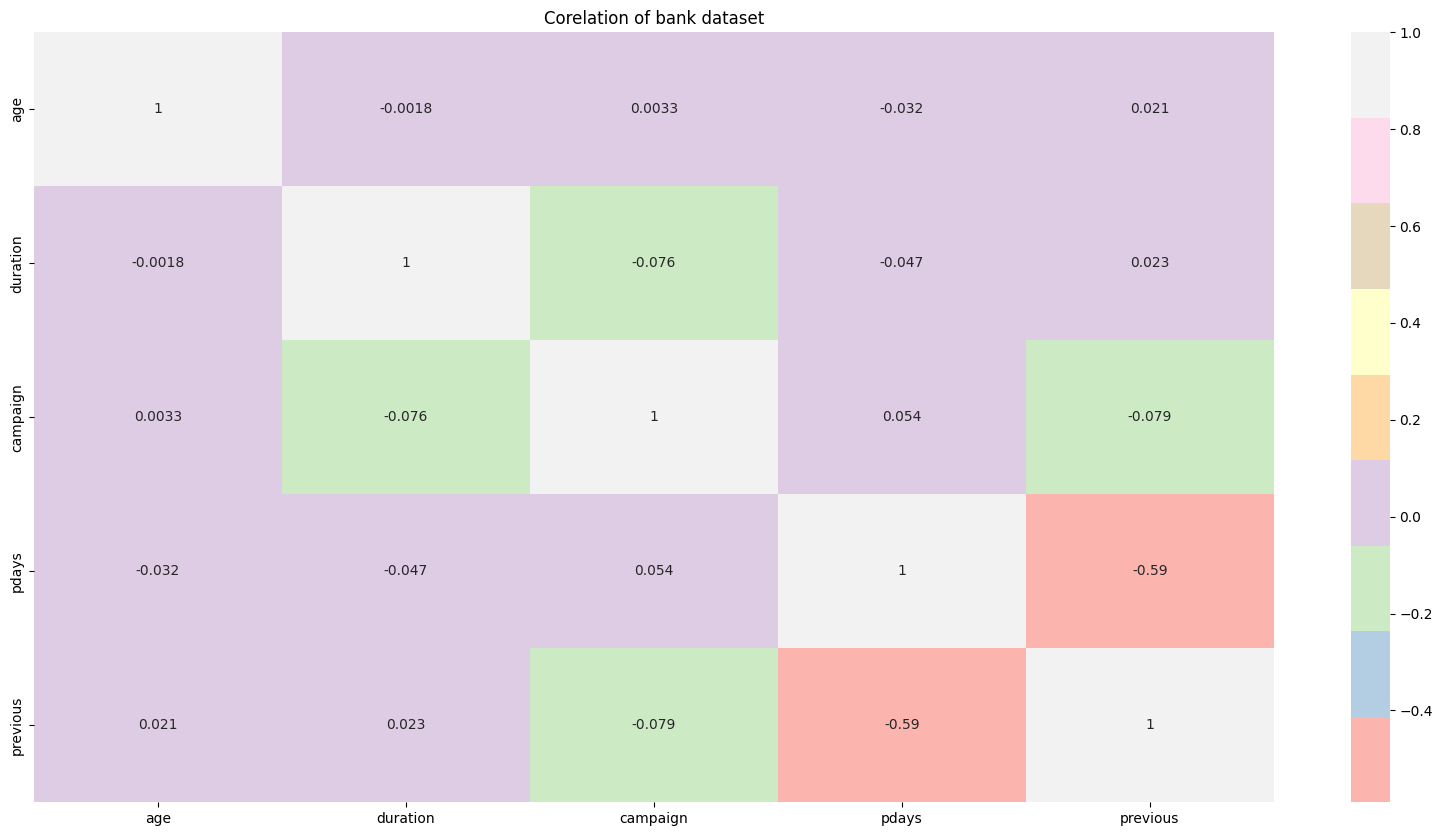

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot = True , cmap = 'Pastel1')
plt.title('Corelation of bank dataset')
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['y']= le.fit_transform(df['y'])

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['job']= le.fit_transform(df['job'])
df['marital']= le.fit_transform(df['marital'])
df['education']= le.fit_transform(df['education'])
df['default']= le.fit_transform(df['default'])
df['housing']= le.fit_transform(df['housing'])
df['loan']= le.fit_transform(df['loan'])
df['contact']= le.fit_transform(df['contact'])
df['month']= le.fit_transform(df['month'])
df['day_of_week']= le.fit_transform(df['day_of_week'])
df['poutcome']= le.fit_transform(df['poutcome'])

In [10]:
df['poutcome']

0        1
1        0
2        1
3        1
4        1
        ..
32945    1
32946    0
32947    1
32948    1
32949    1
Name: poutcome, Length: 32950, dtype: int64

In [11]:
df['y']

0        0
1        0
2        1
3        0
4        0
        ..
32945    0
32946    0
32947    0
32948    0
32949    0
Name: y, Length: 32950, dtype: int64

In [12]:
df['y'].unique()

array([0, 1])

In [13]:
y = df['y'].value_counts() #class imbalance issue

y


0    29238
1     3712
Name: y, dtype: int64

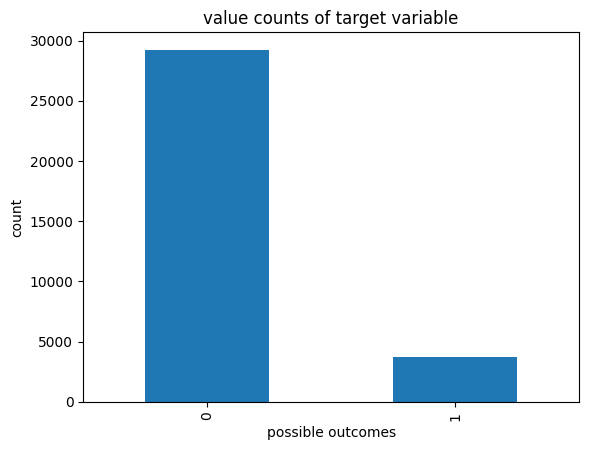

In [14]:
df.y.value_counts().plot(kind='bar')
plt.title('value counts of target variable')
plt.xlabel('possible outcomes')
plt.ylabel('count')
plt.show()

In [45]:
X = df.drop(columns = 'y') #feature engineering not needed since no.of columns is not too much
Y= df[['y']] #double square bracket is use to store data in column format

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
X_test.shape

(8238, 15)

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = lr.predict(X_test)
score = accuracy_score(Y_test, y_pred)
accuracy = score*100
print(accuracy)

print('confusion matrix')
cm = confusion_matrix(Y_test, y_pred)
print(cm)

90.30104394270454
confusion matrix
[[7098  184]
 [ 615  341]]


In [18]:
from sklearn.tree import DecisionTreeClassifier #works on probability concept
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [19]:
from sklearn.metrics import accuracy_score

y_pred = dtc.predict(X_test)
score = accuracy_score(Y_test, y_pred)
accuracy = score*100
print(accuracy)

from sklearn.metrics import confusion_matrix

print('confusion matrix')
cm = confusion_matrix(Y_test, y_pred)
print(cm)

87.59407623209516
confusion matrix
[[6753  529]
 [ 493  463]]


In [20]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix

y_pred = nb.predict(X_test)
score = accuracy_score(Y_test, y_pred)
accuracy = score*100
print(accuracy)

print('confusion matrix')
cm = confusion_matrix(Y_test,y_pred)
print(cm)

87.50910415149308
confusion matrix
[[6769  513]
 [ 516  440]]


In [22]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,Y_train)

SVC()

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix

y_pred = svc.predict(X_test)
score = accuracy_score(Y_test, y_pred)
accuracy = score*100
print(accuracy)

print('confusion matrix')
cm = confusion_matrix(Y_test,y_pred)
print(cm)

89.96115562029618
confusion matrix
[[7116  166]
 [ 661  295]]


In [24]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10,criterion = 'entropy')
rfc.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix

y_predict = rfc.predict(X_test)

accuracy = accuracy_score(Y_test,y_predict)
score = accuracy*100

print(score)

print('confusion matrix')

cm=confusion_matrix(Y_test,y_predict)

print(cm)


89.57271182325808
confusion matrix
[[7053  229]
 [ 630  326]]


In [47]:
#how to resolve class imbalance issue:

from imblearn.over_sampling import SMOTE #dataset will be added to balance both values of target columns (e.g initially data will be 1000 so it will increase to 2000)

sm = SMOTE(random_state = 42) #seed value to be given to smote function
X_re,Y_re = sm.fit_resample(X,Y)

X_train,X_test,Y_train,Y_test = train_test_split(X_re,Y_re,test_size=0.25)

X.shape


(32950, 15)

In [ ]:
Y_re

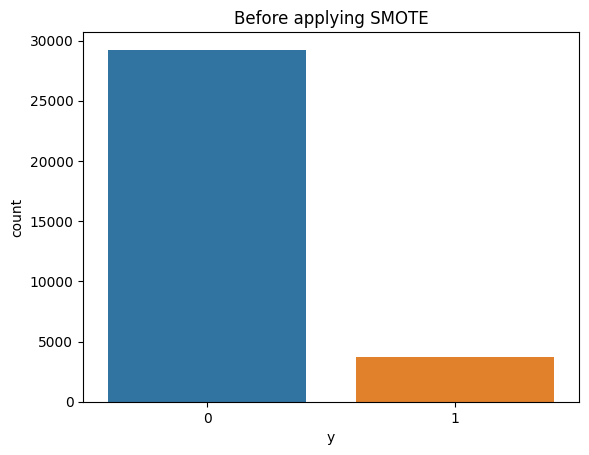

In [39]:
sns.countplot(x ='y', data =df)
plt.title('Before applying SMOTE')
plt.show()



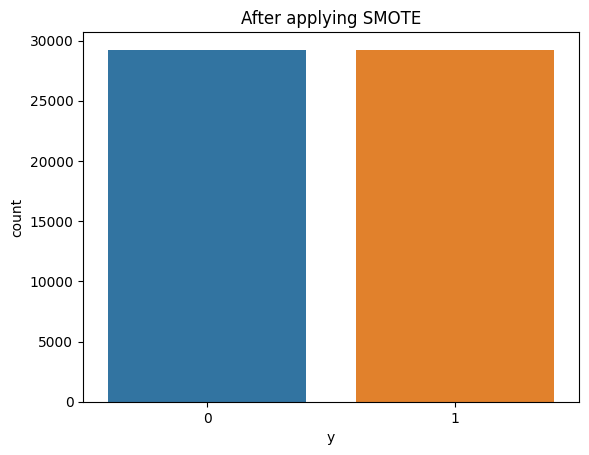

In [49]:
sns.countplot(x ='y', data =Y_re)
plt.title('After applying SMOTE')
plt.show()

In [55]:
from sklearn.neighbors import KNeighborsClassifier
models = {
    "                  Logistic Regression": LogisticRegression(),
    "                 Gaussian Naive Bayes": GaussianNB(),
    "                 Support Vector Machine": SVC(),
    "                 K-Nearest Neighbors": KNeighborsClassifier(),#it works on counting the nearest samples provided within the pre define value of k
    "                 Decision Tree":DecisionTreeClassifier(),
    "                 RandomForest": RandomForestClassifier()
}

for name, model in models.items(): #models.item() will access the items/functions in the models dictionary(name of model will store in name and model will store diff models)
    model.fit(X_train, Y_train)
    print(name + " trained.")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

                  Logistic Regression trained.
                 Gaussian Naive Bayes trained.
                 Support Vector Machine trained.
                 K-Nearest Neighbors trained.


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


                 Decision Tree trained.


<ipython-input-55-b120fa0446fb>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


                 RandomForest trained.


In [58]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, Y_test) * 100))  #score is different from accuracy_score.score function takes x-test and predicts y values and then compares it with y-test so it is a automate function

                  Logistic Regression: 83.25%
                 Gaussian Naive Bayes: 81.24%
                 Support Vector Machine: 78.17%
                 K-Nearest Neighbors: 89.12%
                 Decision Tree: 90.62%
                 RandomForest: 93.87%


Confusion Matrix
                  Logistic Regression
[[6227 1131]
 [1317 5944]]


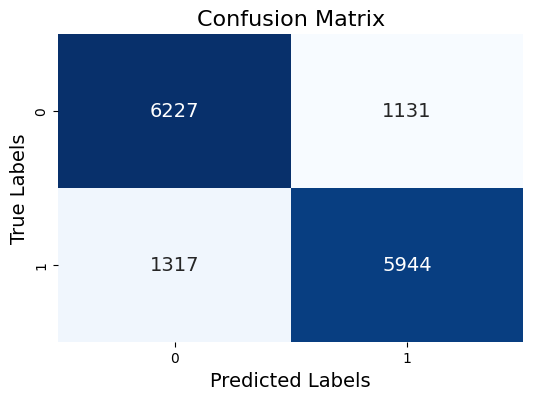

Confusion Matrix
                 Gaussian Naive Bayes
[[6061 1297]
 [1446 5815]]


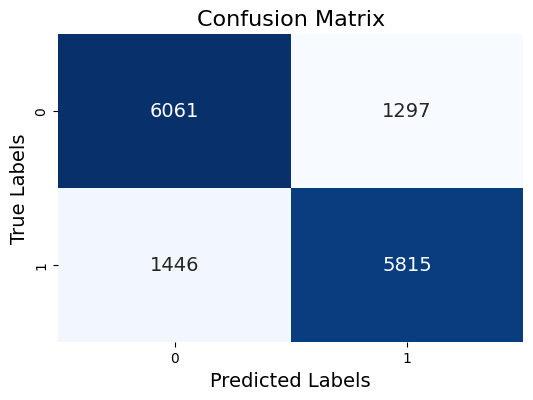

Confusion Matrix
                 Support Vector Machine
[[6263 1095]
 [2096 5165]]


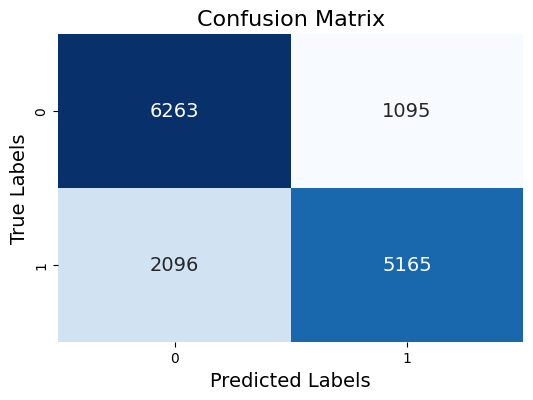

Confusion Matrix
                 K-Nearest Neighbors
[[5872 1486]
 [ 105 7156]]


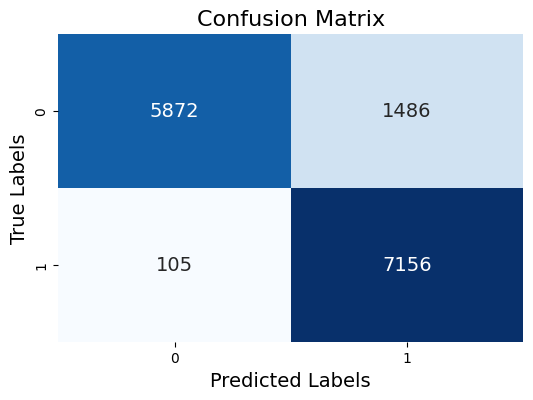

Confusion Matrix
                 Decision Tree
[[6594  764]
 [ 607 6654]]


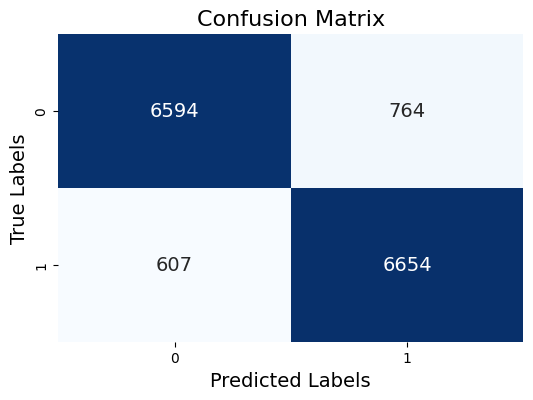

Confusion Matrix
                 RandomForest
[[6806  552]
 [ 344 6917]]


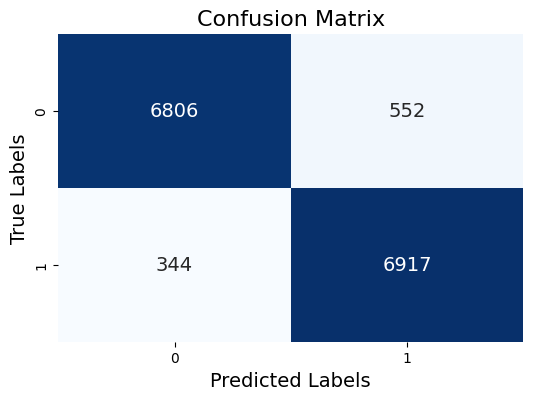

In [60]:
for name, model in models.items():
  y_pred = model.predict(X_test)
  # PRINT THE CONFUSION MATRIX
  print("Confusion Matrix")
  print(name)
  cm = confusion_matrix(Y_test, y_pred)
  print(cm)
  plt.figure(figsize = (6, 4))
  sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, annot_kws = {'size' : 14})
  plt.xlabel('Predicted Labels', fontsize = 14)
  plt.ylabel('True Labels', fontsize = 14)
  plt.title('Confusion Matrix', fontsize = 16)
  plt.show()